# Corona Virus In the United States

Today we are faced with a virus that is rapidly spreading and affecting everyone across the world. While the world governments are taking action and implementing safety procedures; we still see that the virus is spreading. This draws the questions if these actions are preventing the spread or simply just stalling the spread. The data being collected will give me the option to be able to see when the virus will be predicted to end and if the safety measurements being taken are actually slowing down the spread for the virus. By using linear regression I will be able to map out the trajectory of the virus. Also, I will be able to use a time series to map out when certain safety precautions have been taken and what effects those actions have on the virus outbreak.

In [49]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy.stats
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix

Importing two datasets that were located in Kaggles Week 1 competition for Coronavirus. 

In [2]:
testData = pd.read_csv('test.csv')
trainData = pd.read_csv('train.csv')


In [3]:
display(trainData.tail())

,Id,Province/State,Country/Region,Lat,Long,Date,ConfirmedCases,Fatalities
17887,26378,NaN,Zambia,-15.4167,28.2833,2020-03-20,2.0,0.0
17888,26379,NaN,Zambia,-15.4167,28.2833,2020-03-21,2.0,0.0
17889,26380,NaN,Zambia,-15.4167,28.2833,2020-03-22,3.0,0.0
17890,26381,NaN,Zambia,-15.4167,28.2833,2020-03-23,3.0,0.0
17891,26382,NaN,Zambia,-15.4167,28.2833,2020-03-24,3.0,0.0


In [4]:
display(testData.head())

,ForecastId,Province/State,Country/Region,Lat,Long,Date
0,1,NaN,Afghanistan,33.0,65.0,2020-03-12
1,2,NaN,Afghanistan,33.0,65.0,2020-03-13
2,3,NaN,Afghanistan,33.0,65.0,2020-03-14
3,4,NaN,Afghanistan,33.0,65.0,2020-03-15
4,5,NaN,Afghanistan,33.0,65.0,2020-03-16


Data Grooming

In order to make some observations I need to format the data to be useable and integers for graphing.
The date field will be transformated into an integer by removing all symbols and setting the type as an int. 
Alos, I will remove the NAN's from the training set as those will provide no value.
At the same time I will drop the Province/State column as I want to focus on the Country as a whole and not just individual states. 

For the test data I want to make sure that I have the same primary key so I will use the date field and simply perform the same tranformation as I did to the training dataset. 

In [5]:
# Format date
trainData["Date"] = trainData["Date"].apply(lambda x: x.replace("-",""))
trainData["Date"]  = trainData["Date"].astype(int)

testData["Date"] = testData["Date"].apply(lambda x: x.replace("-",""))
testData["Date"]  = testData["Date"].astype(int)

In [6]:
# drop nan's
trainData = trainData.drop(['Province/State'],axis=1)
trainData = trainData.dropna()
trainData.isnull().sum()


Id                0
Country/Region    0
Lat               0
Long              0
Date              0
ConfirmedCases    0
Fatalities        0
dtype: int64

In [7]:
testData.isnull().sum()

ForecastId           0
Province/State    6622
Country/Region       0
Lat                  0
Long                 0
Date                 0
dtype: int64

In [8]:
trainData.nunique()

Id                17892
Country/Region      163
Lat                 272
Long                276
Date                 63
ConfirmedCases     1023
Fatalities          204
dtype: int64

In [9]:
testData.nunique()

ForecastId        12212
Province/State      128
Country/Region      163
Lat                 272
Long                276
Date                 43
dtype: int64

Text(0.5, 0, 'Date')

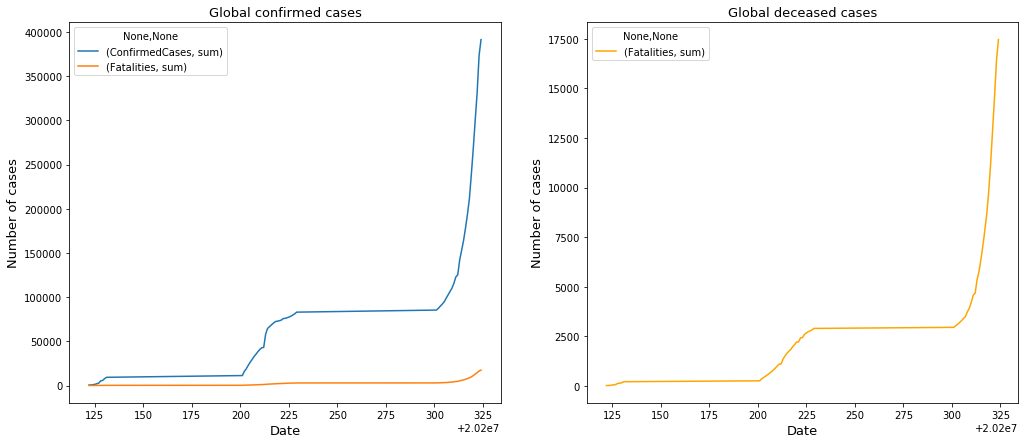

In [10]:
confirmed_total_date = trainData.groupby(['Date']).agg({'ConfirmedCases':['sum']})
fatalities_total_date = trainData.groupby(['Date']).agg({'Fatalities':['sum']})
total_date = confirmed_total_date.join(fatalities_total_date)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(17,7))
total_date.plot(ax=ax1)
ax1.set_title("Global confirmed cases", size=13)
ax1.set_ylabel("Number of cases", size=13)
ax1.set_xlabel("Date", size=13)
fatalities_total_date.plot(ax=ax2, color='orange')
ax2.set_title("Global deceased cases", size=13)
ax2.set_ylabel("Number of cases", size=13)
ax2.set_xlabel("Date", size=13)

### Observation:

The only concern that transparent here is that initially the graph starts out on a straight unaffected line. This could be due to the fact that in the wake of the new virus the health care industry was unsure of the true classification of the virus. This in turn will result is false readings and overlooked cases.

### Action:

When I focus my efforts on the United States I will start the data when the virus was recognized as an issue. 

### Issues:

 Some issues that I see that could be affecting the graph would be the availability of the tests for the COVID-19 virus. Looking at the confirmed cases we can notice that the graph expotentionally grew around the same time that the tests were distrubuted to the affected areas. This could affect the model.

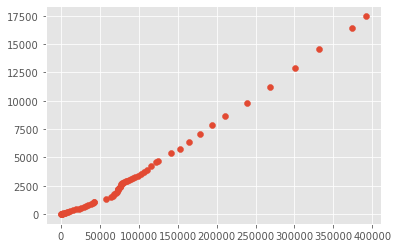

In [11]:
matplotlib.style.use('ggplot')
plt.scatter(confirmed_total_date, fatalities_total_date)
plt.show()

In [12]:
scipy.stats.spearmanr(confirmed_total_date, fatalities_total_date)[0]

1.0

In [13]:
scipy.stats.kendalltau(confirmed_total_date, fatalities_total_date)[0]

0.9999999999999999

# United States Analysis

I want to indentify all of the United States data in the datasets to indentify a cleaner look. Once the Corona Virus became transparent in the United States there were tests available to test and identify for the virus. I anticipate that this analysis will differ from the rest of the world, graph above, as the graph will not include China. China's influence in the data showed a delay in progression against the virus when it comes to tests and indentification protrayed by the spikes in the data. 

When the data came to the United States I expect for it to start out slow then begin to grow exponetionally as more tests will be aviable towards the beginning of the outbreak. China was unaware of the virus at firt with allowed for the virus to spread. As the United States looking in, they should be able to catch the virus early on and take measures early on to prevent a wide spread disease. 

In [14]:
unitedStates =trainData[trainData['Country/Region']=='US']
unitedStates.describe()

,Id,Lat,Long,Date,ConfirmedCases,Fatalities
count,3654.000000,3654.000000,3654.000000,3.654000e+03,3654.000000,3654.000000
mean,22584.500000,37.771567,-84.323891,2.020024e+07,60.047072,0.813355
std,1557.201509,8.018508,46.996733,6.621358e+01,681.297097,7.030237
min,19903.000000,13.444300,-157.498300,2.020012e+07,0.000000,0.000000
25%,21236.250000,34.969700,-99.784000,2.020021e+07,0.000000,0.000000
50%,22584.500000,38.978600,-87.944200,2.020022e+07,0.000000,0.000000
75%,23932.750000,42.230200,-76.802100,2.020031e+07,0.000000,0.000000
max,25266.000000,61.370700,144.793700,2.020032e+07,25681.000000,210.000000


Text(0.5, 0, 'Date')

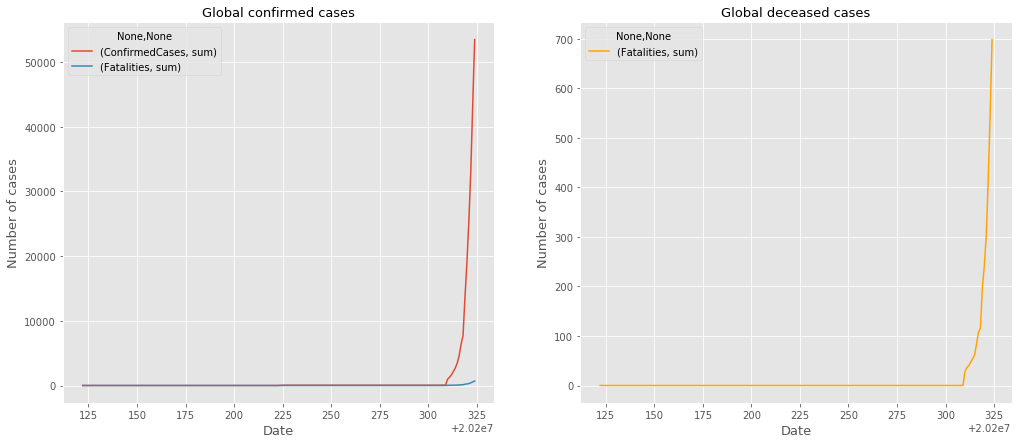

In [15]:
confirmed_total_date_US = unitedStates.groupby(['Date']).agg({'ConfirmedCases':['sum']})
fatalities_total_date_US = unitedStates.groupby(['Date']).agg({'Fatalities':['sum']})
total_date_US = confirmed_total_date_US.join(fatalities_total_date_US)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(17,7))
total_date_US.plot(ax=ax1)
ax1.set_title("Global confirmed cases", size=13)
ax1.set_ylabel("Number of cases", size=13)
ax1.set_xlabel("Date", size=13)
fatalities_total_date_US.plot(ax=ax2, color='orange')
ax2.set_title("Global deceased cases", size=13)
ax2.set_ylabel("Number of cases", size=13)
ax2.set_xlabel("Date", size=13)

## Analysis

Taken from the same timeline we see that there was some time where the virus was not reported in the United States. But once the virus was reported we can see that the cases exploded. 

The United States was aware of the virus as it originated in China. On Jan 21 2020 the United States had it first case of the virus. Then a month later Feb 26, 2020 the United States had it first suspected local transmission. Then a short three days later the United States had reported it first COVID-19 related death.

Looking at the graph above we notice that around early March there is a spike in the data. We are able to see that the graph started to grow. This is because on March 3, 2020 the CDC lifts restrictions for virus testing. This means that people will close contact with people diagnosed for COVID-19 or people will severe symptoms could get tested. 

This, much like what had happened in China, availability in tests to the general public made it clear that the virus had already spread across the population. Once the testing was presented to the United States and people began to take the tests the volume of the virus came into light. Through the month of march the number of cases grew at an alarming rate because of the availibility of the tests gave us a clearer picture. 

I expect this number to keep on growing as a result that tests are not accessible to everyone. Once there is enough tests to completely test everyone who are concerned with having the virus I expect the data to reflect a stead growth in cases and deaths. 

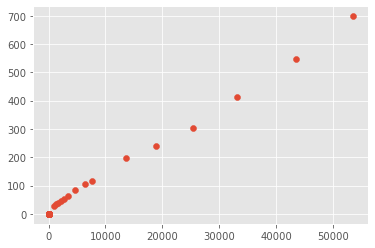

In [16]:
matplotlib.style.use('ggplot')
plt.scatter(confirmed_total_date_US, fatalities_total_date_US)
plt.show()

In [17]:
scipy.stats.spearmanr(confirmed_total_date_US, fatalities_total_date_US)[0]

0.8073991628275585

In [18]:
scipy.stats.kendalltau(confirmed_total_date_US, fatalities_total_date_US)[0]

0.7657375167529012

### Correlation

There is a correlation between the cofirmed number of cases and fatalities in the United States. Even though the number are not similar, they follow a similar pattern and if the number of cases grow so with the number of deaths. 

# Random Forest Classification Model 

The random forest classfication model is an ensemble tree-based learning algorithm. The method is to randomly select subset of training sets and it will aggregate the votes from different decicion trees. This will allow the model to predict the final class of the test object. 

The algorithm is stable and will not move or produce significantly different results if a new data set is introduced. The algorithm also does not have any bias. The algorithm can handle missing values and unscaled data points but for this project I have removed those concerns as it should lead to a better result. 


In [19]:
from sklearn.ensemble import RandomForestClassifier
Tree_model = RandomForestClassifier(max_depth=200, random_state=0)

In [20]:
total_date_US

,ConfirmedCases,Fatalities
,sum,sum
Date,,
20200122,0.0,0.0
20200123,0.0,0.0
20200124,0.0,0.0
20200125,0.0,0.0
20200126,0.0,0.0
...,...,...
20200320,18967.0,241.0
20200321,25347.0,302.0


In [21]:
train_unitedStates=unitedStates.drop(['Country/Region'],axis=1)
trainData_US=train_unitedStates[['Lat','Long','Date']]
trainData_US

,Lat,Long,Date
13482,32.3182,-86.9023,20200122
13483,32.3182,-86.9023,20200123
13484,32.3182,-86.9023,20200124
13485,32.3182,-86.9023,20200125
13486,32.3182,-86.9023,20200126
...,...,...,...
17131,42.7560,-107.3025,20200320
17132,42.7560,-107.3025,20200321
17133,42.7560,-107.3025,20200322
17134,42.7560,-107.3025,20200323


In [22]:
train_unitedStates.to_csv('unitedstatesdata.csv')

In [23]:
test_unitedStates =testData[testData['Country/Region']=='US']
test_unitedStates=test_unitedStates.drop(['Country/Region'],axis=1)
testData_US = test_unitedStates[['Lat','Long','Date']]
testData_US

,Lat,Long,Date
9202,32.3182,-86.9023,20200312
9203,32.3182,-86.9023,20200313
9204,32.3182,-86.9023,20200314
9205,32.3182,-86.9023,20200315
9206,32.3182,-86.9023,20200316
...,...,...,...
11691,42.7560,-107.3025,20200419
11692,42.7560,-107.3025,20200420
11693,42.7560,-107.3025,20200421
11694,42.7560,-107.3025,20200422


In [24]:
testData_US.tail()

,Lat,Long,Date
11691,42.756,-107.3025,20200419
11692,42.756,-107.3025,20200420
11693,42.756,-107.3025,20200421
11694,42.756,-107.3025,20200422
11695,42.756,-107.3025,20200423


In [25]:
train_unitedStates_Confirmed=train_unitedStates[['ConfirmedCases']]
train_unitedStates_Confirmed.describe()

,ConfirmedCases
count,3654.000000
mean,60.047072
std,681.297097
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,25681.000000


In [26]:
train_unitedStates_Fatalities=train_unitedStates[['Fatalities']]
train_unitedStates_Fatalities.describe()

,Fatalities
count,3654.000000
mean,0.813355
std,7.030237
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,210.000000


In [27]:
x = trainData_US
y1 = train_unitedStates_Confirmed
y2 = train_unitedStates_Fatalities
x_test = testData_US

In [28]:
Tree_model.fit(x,y1)
predConfirmed = Tree_model.predict(x_test)
predConfirmed = pd.DataFrame(predConfirmed)
predConfirmed.columns = ["ConfirmedCases_prediction"]

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


In [29]:
predConfirmed

,ConfirmedCases_prediction
0,0.0
1,0.0
2,6.0
3,12.0
4,12.0
...,...
2489,29.0
2490,29.0
2491,29.0
2492,29.0


In [30]:
Tree_model.fit(x,y2)
predFatalities = Tree_model.predict(x_test)
predFatalities = pd.DataFrame(predFatalities)
predFatalities.columns = ["Fatalities_prediction"]

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


In [31]:
predFatalities

,Fatalities_prediction
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
2489,0.0
2490,0.0
2491,0.0
2492,0.0


In [32]:
predictions = predConfirmed.join(predFatalities)
predictions

,ConfirmedCases_prediction,Fatalities_prediction
0,0.0,0.0
1,0.0,0.0
2,6.0,0.0
3,12.0,0.0
4,12.0,0.0
...,...,...
2489,29.0,0.0
2490,29.0,0.0
2491,29.0,0.0
2492,29.0,0.0


Text(0.5, 0, 'Date')

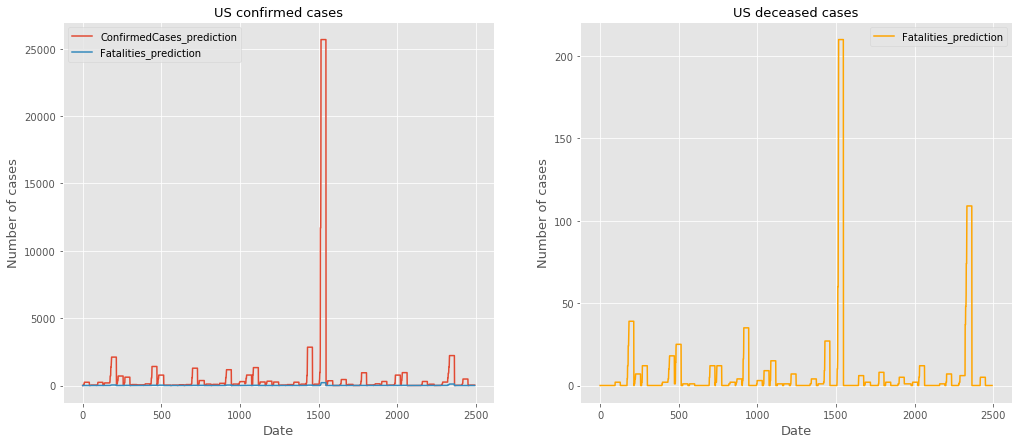

In [33]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(17,7))
predictions.plot(ax=ax1)
ax1.set_title("US confirmed cases", size=13)
ax1.set_ylabel("Number of cases", size=13)
ax1.set_xlabel("Date", size=13)
predFatalities.plot(ax=ax2, color='orange')
ax2.set_title("US deceased cases", size=13)
ax2.set_ylabel("Number of cases", size=13)
ax2.set_xlabel("Date", size=13)

In [34]:
predictions.describe()

,ConfirmedCases_prediction,Fatalities_prediction
count,2494.000000,2494.000000
mean,690.180834,8.576183
std,2943.759642,27.336496
min,0.000000,0.000000
25%,30.000000,0.000000
50%,105.000000,1.000000
75%,368.000000,6.000000
max,25681.000000,210.000000


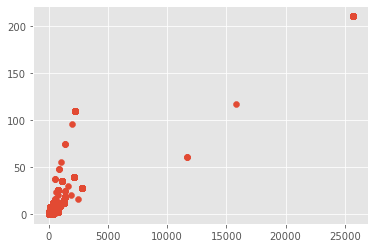

In [35]:
matplotlib.style.use('ggplot')
plt.scatter(predConfirmed, predFatalities)
plt.show()

In [36]:
scipy.stats.spearmanr(predConfirmed, predFatalities)[0]

0.8056651838655811

In [37]:
scipy.stats.kendalltau(predConfirmed, predFatalities)[0]

0.6666551009677553

In [38]:
confirmedCasesPrint = predictions.sum()[0]
fatalititiesPrint = predictions.sum()[1]

In [39]:
print('By 4/23/2020 the below predictions were made: ')
print('{} more people in the US will contract the disease.'.format(confirmedCasesPrint))
print('As a result I predict that {} people will expire.'.format(fatalititiesPrint))

By 4/23/2020 the below predictions were made: 
1721311.0 more people in the US will contract the disease.
As a result I predict that 21389.0 people will expire.


Resources:

1. https://www.cdc.gov/coronavirus/2019-ncov/cases-updates/summary.html
2. https://ourworldindata.org/coronavirus
3. https://www.who.int/emergencies/diseases/novel-coronavirus-2019
4. https://www.worldometers.info/coronavirus/
5. https://informationisbeautiful.net/visualizations/covid-19-coronavirus-infographic-datapack/
6. https://www.ecdc.europa.eu/en/publications-data/rapid-risk-assessment-novel-coronavirus-
disease-2019-covid-19-pandemic-increased
7. https://www.barrons.com/articles/latest-coronavirus-data-show-disease-continues-to-spread-even-in- the-u-s-51584224660
8. https://www.theguardian.com/world/2020/mar/13/coronavirus-pandemic-visualising-the-global-crisis
9. https://ourworldindata.org/coronavirus-source-data
10.https://www.kaggle.com/sudalairajkumar/novel-corona-virus-2019-dataset